## 01 kNN 基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### kNN 基础概念

见PPT

### 实现我们自己的 kNN

#### 创建简单测试用例

In [4]:
# 特征
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
# 类别
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [5]:
# 训练集   X_train 是特征集  y_train是类别
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [6]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [7]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

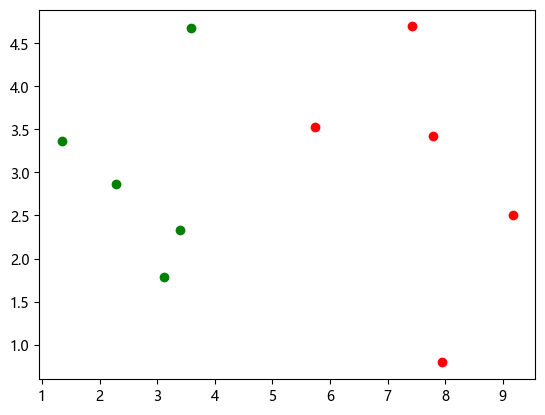

In [8]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

预测：

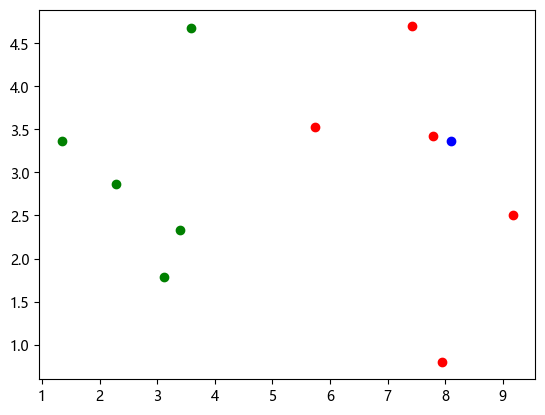

In [9]:
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
# 单独绘制新加的点
plt.scatter(x[0], x[1], color='b')
plt.show()

#### kNN的过程

In [10]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [11]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [12]:
distances = [sqrt(np.sum((x_train - x)**2))
             for x_train in X_train]

In [13]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [14]:
np.argsort(distances) # 排序但是返回的是索引

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [15]:
nearest = np.argsort(distances)

In [16]:
k = 6

In [17]:
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

In [18]:
topK_y

[1, 1, 1, 1, 1, 0]

In [19]:
from collections import Counter
votes = Counter(topK_y)

In [20]:
votes

Counter({1: 5, 0: 1})

In [21]:
votes.most_common(1)# 找出票数最多的一个元素，这里参数可以传2代表找出票数最多的2个参数

[(1, 5)]

In [22]:
predict_y = votes.most_common(1)[0][0]

In [23]:
predict_y

1